<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/EDA/Quora_Question_Pairs_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 다운로드 및 불러오기

In [1]:
ls

drive/  sample_data/


In [2]:
cd drive/MyDrive/Pytorch\ NLP/data_in

/content/drive/MyDrive/Pytorch NLP/data_in


In [3]:
cd Quora_Question_Pairs/

/content/drive/MyDrive/Pytorch NLP/data_in/Quora_Question_Pairs


In [4]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
ls

sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [ ]:
for file_name in os.listdir():
  zipfile.ZipFile(file_name).extractall()

In [5]:
ls

sample_submission.csv      test.csv      train.csv
sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [6]:
train_df=pd.read_csv('train.csv')
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# 특징 분석

In [7]:
print("학습 데이터 question 쌍 개수 : {}".format(len(train_df)))

학습 데이터 question 쌍 개수 : 404290


## 중복 질문 분석

In [8]:
# quesiton 하나로 잇기
train_set=pd.Series(train_df['question1'].tolist()+train_df['question2'].tolist()).astype(str)
train_set[:3]

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
dtype: object

In [9]:
print("고유 질문 수 :{}".format(len(np.unique(train_set))))
print("중복 질문 수 :{}".format(np.sum(train_set.value_counts()>1)))

고유 질문 수 :537361
중복 질문 수 :111873


### 히스토그램

Text(0, 0.5, 'Number of questions')

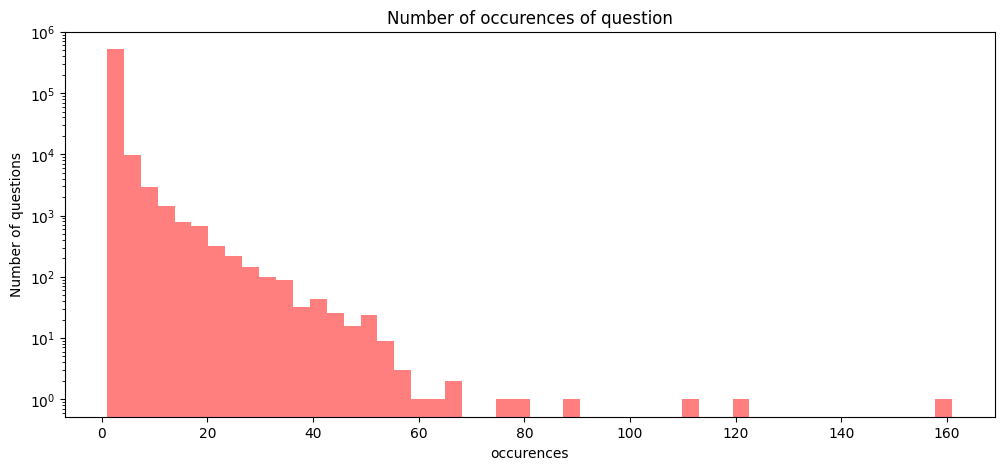

In [10]:
# 그래프 크기
plt.figure(figsize=(12,5))

# 히스토그램 ( 리스트,Series내의 요소의 중복 개수에 대한 그래프) ( x : 중복 횟수 y : 해당 중복 횟수에 해당하는 문장의 개수)
plt.hist(train_set.value_counts(),bins=50,alpha=0.5,color='r',label='sentence')

plt.yscale('log',nonpositive='clip')

plt.title("Number of occurences of question")
plt.xlabel("occurences")
plt.ylabel("Number of questions")

### 통계치

In [11]:
## 통계치로 확인

print("중복 최대 개수 : {}".format(np.max(train_set.value_counts())))
print("중복 최소 개수 : {}".format(np.min(train_set.value_counts())))
print("중복 평균 개수 : {:.2f}".format(np.mean(train_set.value_counts())))
print("중복 표준 편차 : {:.2f}".format(np.std(train_set.value_counts())))
print("중복 중간값 : {}".format(np.median(train_set.value_counts())))
print("중복 1사분위 : {}".format(np.percentile(train_set.value_counts(),25)))
print("중복 3사분위 : {}".format(np.percentile(train_set.value_counts(),75)))

중복 최대 개수 : 161
중복 최소 개수 : 1
중복 평균 개수 : 1.50
중복 표준 편차 : 1.91
중복 중간값 : 1.0
중복 1사분위 : 1.0
중복 3사분위 : 1.0


### 박스 플롯

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0dd1e22c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0dd1e24250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0dd1e227f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0dd1e24790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0dd1e24cd0>],
 'means': [<matplotlib.lines.Line2D at 0x7f0dd1e24a30>]}

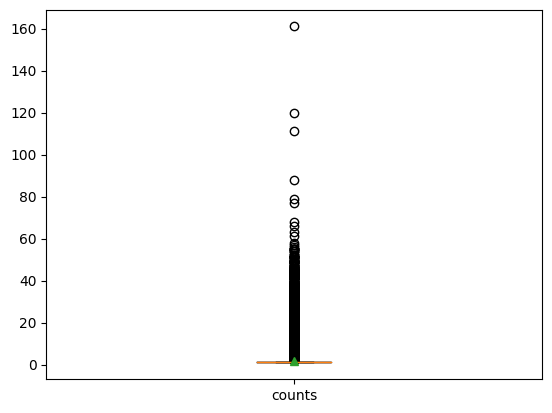

In [ ]:
plt.boxplot([train_set.value_counts()],labels=['counts'],showmeans=True)

### WordCloud

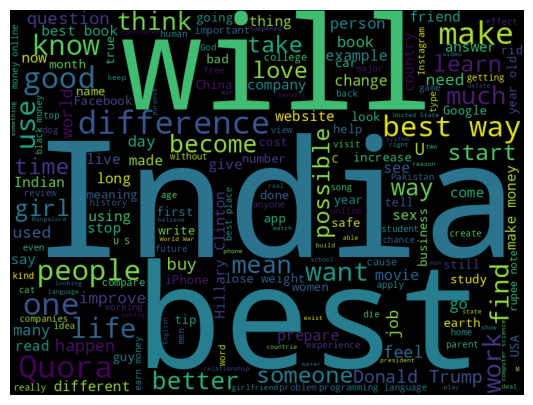

In [ ]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=800,height=600).generate(' '.join(train_set.astype(str)))
plt.figure(figsize=(12,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 라벨 분포

<Axes: xlabel='is_duplicate', ylabel='count'>

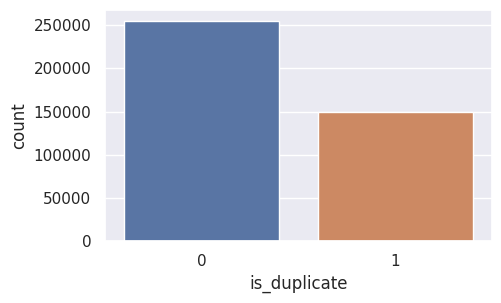

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(x='is_duplicate',data=train_df)

## 문장 길이 (character level, token level) 분석

### character level sequcen length

In [12]:
train_length=train_set.apply(len)
train_length.head()

0    66
1    51
2    73
3    50
4    76
dtype: int64

### 히스토그램

Text(0, 0.5, 'Probability')

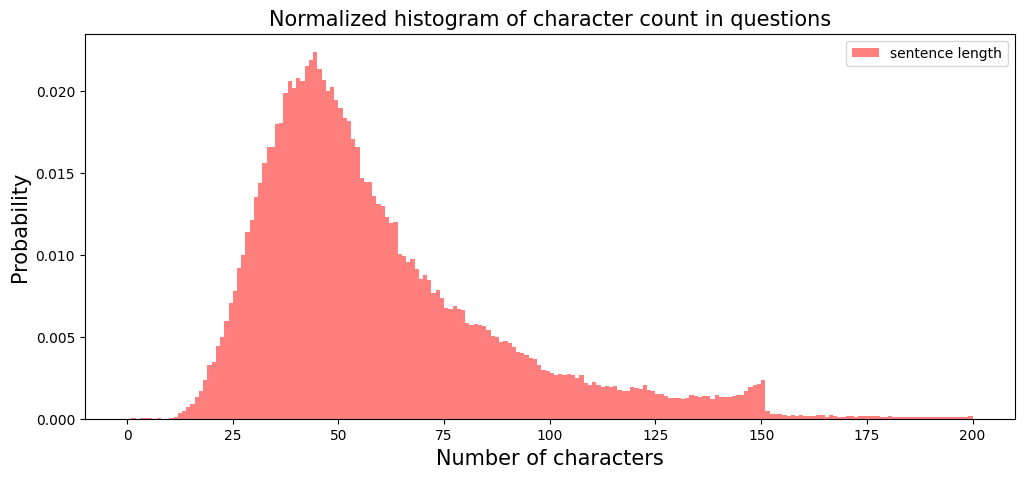

In [21]:
plt.figure(figsize=(12,5))

plt.hist(train_length,bins=200,range=[0,200],alpha=0.5,density=True,color='r',label='sentence length')

plt.title('Normalized histogram of character count in questions',fontsize=15)
plt.legend()

plt.xlabel('Number of characters',fontsize=15)
plt.ylabel('Probability',fontsize=15)

### 통계값

In [23]:
print("문장 최대 길이 : {}".format(np.max(train_length)))
print("문장 최소 길이 : {}".format(np.min(train_length)))
print("문장 길이 평균 : {:.2f}".format(np.mean(train_length)))
print("문장 길이 표준편차 : {:.2f}".format(np.std(train_length)))
print("문장 길이 중간값 : {}".format(np.median(train_length)))
print("문장 길이 1사분위 : {}".format(np.percentile(train_length,25)))
print("문장 길이 3사분위 : {}".format(np.percentile(train_length,75)))

문장 최대 길이 : 1169
문장 최소 길이 : 1
문장 길이 평균 : 59.82
문장 길이 표준편차 : 31.96
문장 길이 중간값 : 51.0
문장 길이 1사분위 : 39.0
문장 길이 3사분위 : 72.0


### 박스플롯

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7519b4a760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7519b4aa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7519b4af40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f751a98cee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7519b6e100>],
 'means': [<matplotlib.lines.Line2D at 0x7f7519b6e6a0>]}

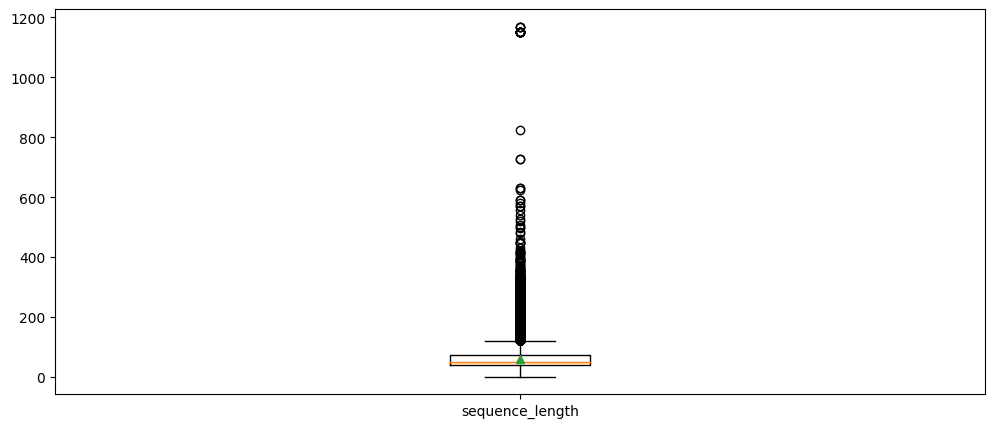

In [24]:
plt.figure(figsize=(12,5))

plt.boxplot([train_length],labels=['sequence_length'],showmeans=True)

### token level sequecne length

## 라벨 빈도 분석

## 특수 문자 분석